# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [39]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Text(0, 0.5, 'Number of visitors')

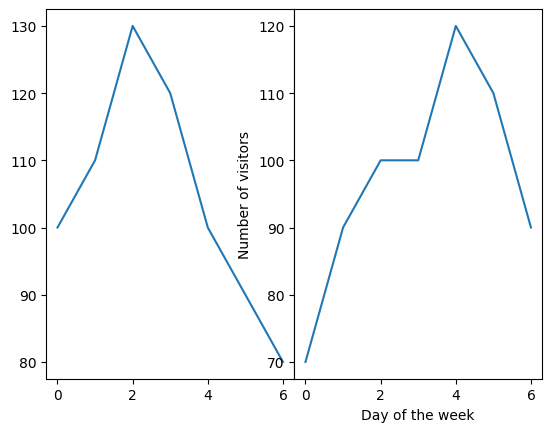

In [2]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

***Advantages:***

- Each week's data is plotted separately, making it easier to focus on the trends within each week.
- Reduces visual clutter, as the lines for the two weeks do not overlap.
- Allows viewers to analyze the patterns and fluctuations in each week independently.
- Prevents overlapping lines, which can make it difficult to distinguish between the two datasets.

***Disadvantages:***

- Two separate plots take up more space, which may not be ideal for compact visualizations.
- Direct comparison between the two weeks is less intuitive since the plots are separated.


Text(0, 0.5, 'Number of visitors')

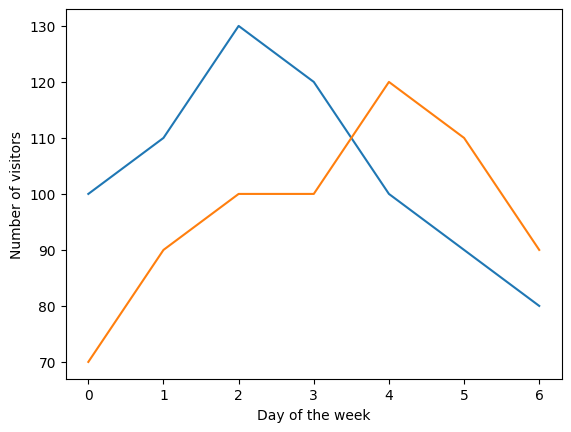

In [3]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

***Advantages:***
- Both weeks are plotted on the same graph, saving space and providing a single view of the data.
- Directly overlays the two weeks, making it easier to compare trends and differences between them.
- Useful for presentations where quick comparisons are needed.

***Disadvantages:***
- Overlapping lines can make it harder to distinguish between the two datasets, especially if the trends are similar.
- Without clear labeling or color coding, viewers may struggle to identify which line corresponds to which week.


# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

# Customer Churn Dataset

In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sudeemangalwadekar/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1


In [65]:
df_customer_churn_dataset_test= pd.read_csv(path + "/customer_churn_dataset-testing-master.csv", sep=',')
df_customer_churn_dataset_train= pd.read_csv(path + "/customer_churn_dataset-training-master.csv", sep=',')
df_customer_churn_combined = pd.concat([df_customer_churn_dataset_test, df_customer_churn_dataset_train], ignore_index=True)
df_customer_churn_combined = df_customer_churn_combined.dropna()
df_customer_churn_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [66]:
df_customer_churn_combined.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [67]:
df_customer_churn_combined.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


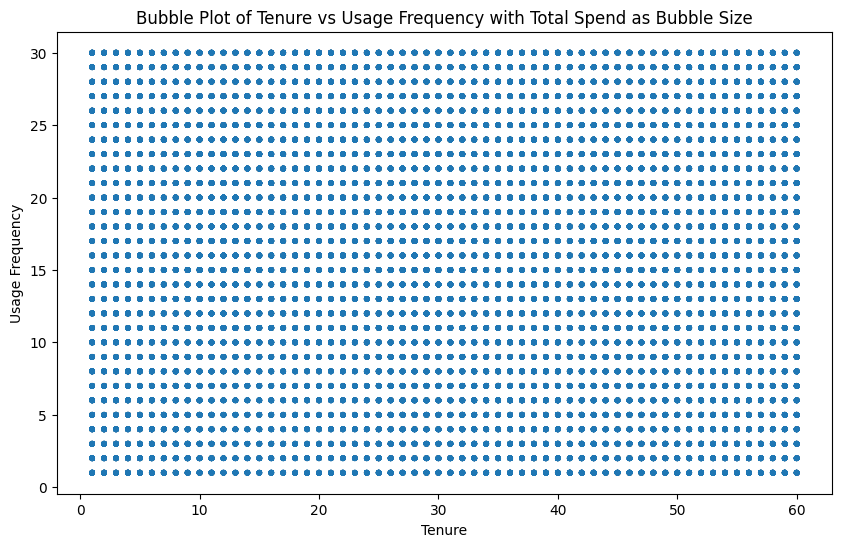

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_customer_churn_combined['Tenure'],
    df_customer_churn_combined['Usage Frequency'],
    s=df_customer_churn_combined['Total Spend']/100,  # Scale bubble size for better visualization
    alpha=0.5
)
plt.xlabel('Tenure')
plt.ylabel('Usage Frequency')
plt.title('Bubble Plot of Tenure vs Usage Frequency with Total Spend as Bubble Size')
plt.show()

In [74]:
df_customer_churn_combined.columns

df_customer_churn_combined.rename(columns={'Subscription Type': 'Subscription_Type', 'Contract Length': 'Contract_Length'}, inplace=True)
print(df_customer_churn_combined[['Subscription_Type','Contract_Length']].head())
print(df_customer_churn_combined['Churn'].value_counts())
df_customer_churn_combined['Subscription_Type'] = df_customer_churn_combined['Subscription_Type'].astype(str)
df_customer_churn_combined['Contract_Length'] = df_customer_churn_combined['Contract_Length'].astype(str)

pivot_churn = df_customer_churn_combined.pivot_table(
    values='Churn',
    index='Subscription_Type',
    columns='Contract_Length',
    aggfunc='sum'
)
print(pivot_churn)

  Subscription_Type Contract_Length
0             Basic         Monthly
1          Standard         Monthly
2           Premium          Annual
3           Premium       Quarterly
4          Standard          Annual
Churn
1.0    280492
0.0    224714
Name: count, dtype: int64
Contract_Length     Annual  Monthly  Quarterly
Subscription_Type                             
Basic              30584.0  32892.0    30090.0
Premium            30386.0  32838.0    29909.0
Standard           30571.0  32795.0    30427.0


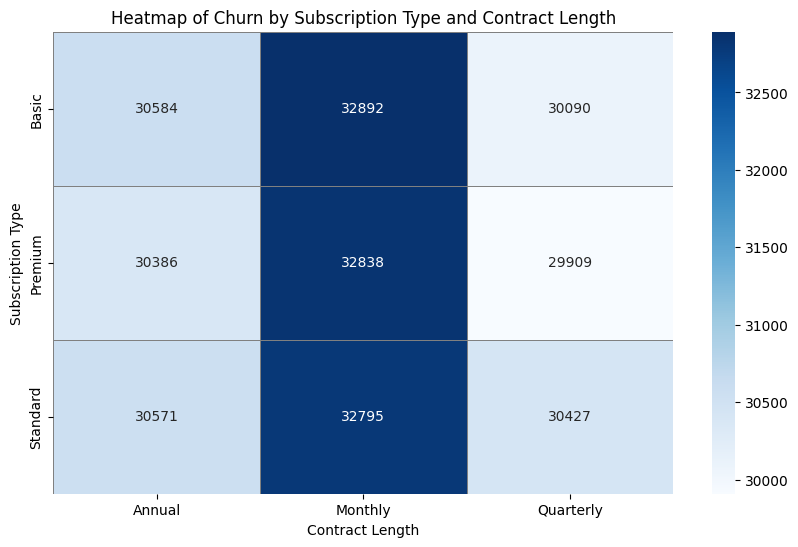

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_churn, 
    annot=True, 
    fmt=".0f", 
    cmap="Blues", 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title("Heatmap of Churn by Subscription Type and Contract Length")
plt.xlabel("Contract Length")
plt.ylabel("Subscription Type")
plt.show()

In [57]:
df_customer_churn_combined.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [30]:
# Drop non-numeric columns and rows with missing values
df_customer_churn_combined_dropPCA = df_customer_churn_combined.drop(columns=['CustomerID', 'Churn'])
numeric_data = df_customer_churn_combined_dropPCA.select_dtypes(include=[np.number]).dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_customer_churn_combined_numeric_data_scaled = scaler.fit_transform(numeric_data)
#perform PCA on the df_customer_churn_combined DataFrame
pca3_df_customer_churn_combined = decomposition.PCA(n_components = 3)
principal_components = pca3_df_customer_churn_combined.fit_transform(df_customer_churn_combined_numeric_data_scaled)
print(pca3_df_customer_churn_combined.explained_variance_ratio_)
print(pca3_df_customer_churn_combined.components_)
pca_df_customer_churn_combined = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
print(pca_df_customer_churn_combined)

[0.20568445 0.14579619 0.13999738]
[[ 0.36634443 -0.04749091 -0.08247653  0.58597233  0.45415607 -0.50464405
   0.22901323]
 [-0.01776592  0.72425153 -0.6882977  -0.00164323  0.00667261  0.02235482
  -0.02904149]
 [-0.28874247  0.33242636  0.32282671 -0.04981647 -0.0043479   0.02395378
   0.83595996]]
        Principal Component 1  Principal Component 2  Principal Component 3
0                    0.174979              -0.077568              -0.339847
1                    0.712186              -1.147147               0.835748
2                    0.656222               0.267464               0.190822
3                    1.256007              -0.680478              -0.192056
4                    0.849335               0.408298               0.765686
...                       ...                    ...                    ...
505201              -1.457070               1.029786              -0.224406
505202              -1.108439              -0.683102              -1.387607
505203       

/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [33]:
first_component = pca3_df_customer_churn_combined.components_[0]
print("First Principal Component Weights:", first_component)
feature_names = numeric_data.select_dtypes(include=[np.number]).columns
for feature, weight in zip(feature_names, first_component):
    print(f"Feature: {feature}, Weight: {weight}")

First Principal Component Weights: [ 0.36634443 -0.04749091 -0.08247653  0.58597233  0.45415607 -0.50464405
  0.22901323]
Feature: Age, Weight: 0.3663444333413211
Feature: Tenure, Weight: -0.04749091396535457
Feature: Usage Frequency, Weight: -0.08247653091666901
Feature: Support Calls, Weight: 0.5859723325508827
Feature: Payment Delay, Weight: 0.45415607259402324
Feature: Total Spend, Weight: -0.5046440536099326
Feature: Last Interaction, Weight: 0.2290132255252938


In [ ]:
# Encode categorical columns
df_customer_churn_combined['Gender'] = df_customer_churn_combined['Gender'].map({'Male': 0, 'Female': 1})
df_customer_churn_combined['Subscription Type'] = df_customer_churn_combined['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
df_customer_churn_combined['Contract Length'] = df_customer_churn_combined['Contract Length'].map({'Month-to-Month': 0, 'One Year': 1, 'Two Years': 2})
X = df_customer_churn_combined[[ 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction']]
y = df_customer_churn_combined['Churn']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_predict_churn_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_predict_churn_model.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred = rf_predict_churn_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.20052772945870734


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [2, 4, 6, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring="neg_root_mean_squared_error",
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters for Random forest model predicting a response:", random_search.best_params_)
print("Best Score for Random forest model predicting a response:", random_search.best_score_)

Best Parameters for Random forest model predicting a response: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best Score for Random forest model predicting a response: -0.1951968734237951


In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

RMSE: 0.20052772945870734
MAE: 0.08052205780391773
R² Score: 0.8372712184980166


# Digital marketing Dataset

In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sudeemangalwadekar/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1


In [49]:
df_digital_marketing_campaign= pd.read_csv(path + "/digital_marketing_campaign_dataset.csv", sep=',')
df_digital_marketing_campaign.info()
df_digital_marketing_campaign.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [50]:
print(df_digital_marketing_campaign.head())

   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  Ema

In [51]:
df_digital_marketing_campaign.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [79]:
df_digital_marketing_campaign = df_digital_marketing_campaign.drop_duplicates()
# Drop rows with missing values
df_digital_marketing_campaign = df_digital_marketing_campaign.dropna()

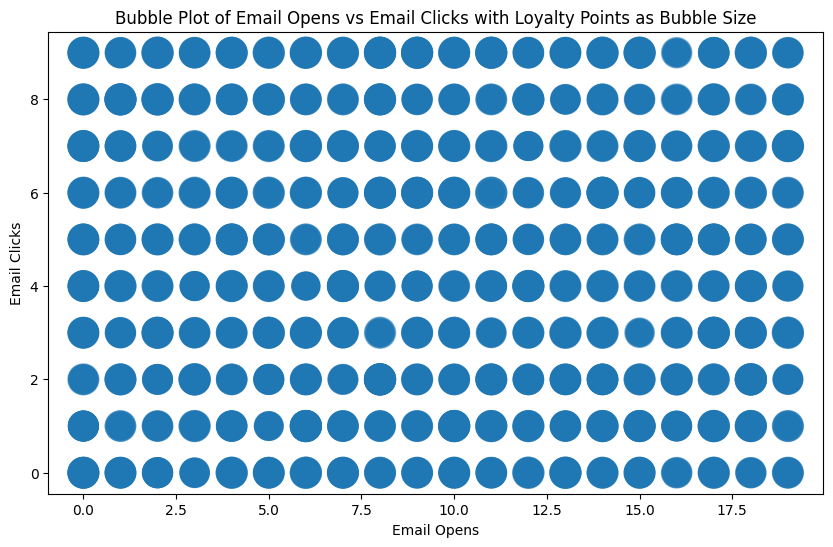

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_digital_marketing_campaign['EmailOpens'],
    df_digital_marketing_campaign['EmailClicks'],
    s=df_digital_marketing_campaign['LoyaltyPoints'] / 10,  # Scale bubble size for better visualization
    alpha=0.5
)
plt.xlabel('Email Opens')
plt.ylabel('Email Clicks')
plt.title('Bubble Plot of Email Opens vs Email Clicks with Loyalty Points as Bubble Size')
plt.show()

CampaignType        Awareness  Consideration    Conversion     Retention
CampaignChannel                                                         
Email            1.845084e+06   2.002153e+06  2.150688e+06  1.873651e+06
PPC              2.056792e+06   2.021319e+06  2.157813e+06  1.963313e+06
Referral         2.220263e+06   2.036699e+06  2.226189e+06  2.170368e+06
SEO              2.001481e+06   1.824554e+06  1.980840e+06  1.934028e+06
Social Media     1.954227e+06   1.976548e+06  1.784546e+06  1.827002e+06


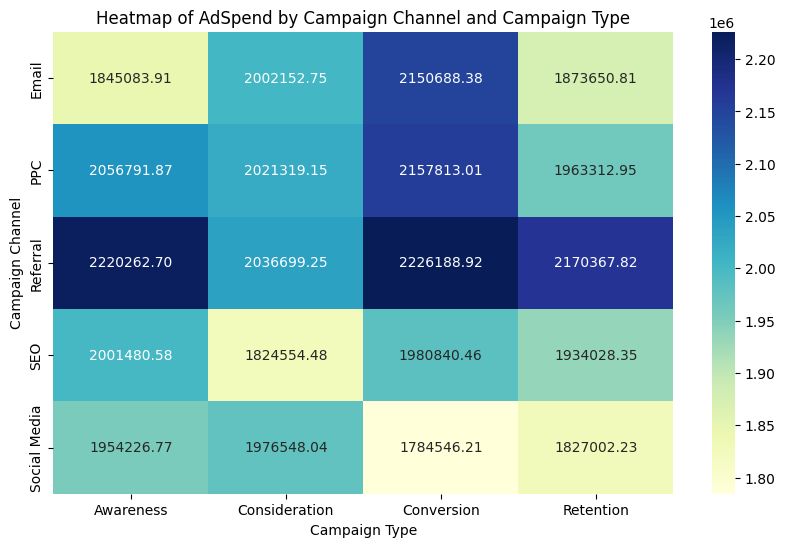

In [81]:
pivot_table = df_digital_marketing_campaign.pivot_table(
    values='AdSpend',
    index='CampaignChannel',
    columns='CampaignType',
    aggfunc='sum'
)

print(pivot_table)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of AdSpend by Campaign Channel and Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Campaign Channel")
plt.show()

In [82]:
df_digital_marketing_campaign.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [99]:
# Drop non-numeric columns and rows with missing values
df_digital_marketing_campaigndropPCA = df_digital_marketing_campaign.drop(columns=['CustomerID', 'Gender', 'CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool','Conversion'])
numeric_data = df_digital_marketing_campaigndropPCA.select_dtypes(include=[np.number]).dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_digital_marketing_campaign_scaled = scaler.fit_transform(numeric_data)
#perform PCA on the df_digital_marketing_campaign DataFrame
pca3_df_digital_marketing_campaign = decomposition.PCA(n_components = 3)
principal_components = pca3_df_digital_marketing_campaign.fit_transform(df_digital_marketing_campaign_scaled)
print(pca3_df_digital_marketing_campaign.explained_variance_ratio_)
print(pca3_df_digital_marketing_campaign.components_)
pca_df_digital_marketing_campaign = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
print(pca_df_digital_marketing_campaign)

[0.08334769 0.08019936 0.07966997]
[[ 0.02790849  0.26801731 -0.28184154  0.09696594  0.42414559 -0.35004489
   0.38624949  0.35017659  0.20798634 -0.10019434  0.05149642 -0.39255842
  -0.23292994]
 [ 0.62025898  0.29059283  0.16561279  0.11277109  0.30909351 -0.01548348
  -0.12446941 -0.14884753 -0.34995587  0.40823346  0.17566601 -0.11473688
   0.15529377]
 [-0.0886904   0.11257854  0.18210686  0.61288846 -0.30870987 -0.35355329
  -0.0248236   0.11014889 -0.41146838 -0.03738371 -0.27182579  0.07763601
  -0.29494717]]
      Principal Component 1  Principal Component 2  Principal Component 3
0                  0.384720               1.180920               0.483358
1                 -0.516622               1.660883              -1.068287
2                  0.872832               0.020950               2.582489
3                  0.851302              -2.380111              -1.120143
4                  0.110662               1.056455               1.391533
...                     ...    

/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [100]:
first_component = pca3_df_digital_marketing_campaign.components_[0]
print("First Principal Component Weights:", first_component)
feature_names = numeric_data.select_dtypes(include=[np.number]).columns
for feature, weight in zip(feature_names, first_component):
    print(f"Feature: {feature}, Weight: {weight}")

First Principal Component Weights: [ 0.02790849  0.26801731 -0.28184154  0.09696594  0.42414559 -0.35004489
  0.38624949  0.35017659  0.20798634 -0.10019434  0.05149642 -0.39255842
 -0.23292994]
Feature: Age, Weight: 0.027908490561032416
Feature: Income, Weight: 0.2680173054373264
Feature: AdSpend, Weight: -0.2818415400539745
Feature: ClickThroughRate, Weight: 0.09696593738101818
Feature: ConversionRate, Weight: 0.4241455855492024
Feature: WebsiteVisits, Weight: -0.3500448856289177
Feature: PagesPerVisit, Weight: 0.38624948901902356
Feature: TimeOnSite, Weight: 0.35017659493291575
Feature: SocialShares, Weight: 0.20798633614169892
Feature: EmailOpens, Weight: -0.10019433629745363
Feature: EmailClicks, Weight: 0.051496421161273655
Feature: PreviousPurchases, Weight: -0.39255842453944717
Feature: LoyaltyPoints, Weight: -0.23292994485336355


In [91]:
df_digital_marketing_campaign.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [94]:
df_digital_marketing_campaign_encoded = pd.get_dummies(
    df_digital_marketing_campaign, 
    columns=['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool'], 
    drop_first=True, dtype='int'  # Use integer encoding for categorical variables
)

print(df_digital_marketing_campaign_encoded.head())


   CustomerID  Age  Income      AdSpend  ClickThroughRate  ConversionRate  \
0        8000   56  136912  6497.870068          0.043919        0.088031   
1        8001   69   41760  3898.668606          0.155725        0.182725   
2        8002   46   88456  1546.429596          0.277490        0.076423   
3        8003   32   44085   539.525936          0.137611        0.088004   
4        8004   60   83964  1678.043573          0.252851        0.109940   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  ...  LoyaltyPoints  \
0              0       2.399017    7.396803            19  ...            688   
1             42       2.917138    5.352549             5  ...           3459   
2              2       8.223619   13.794901             0  ...           2337   
3             47       4.540939   14.688363            89  ...           2463   
4              0       2.046847   13.993370             6  ...           4345   

   Conversion  Gender_Male  CampaignChannel_PPC  C

In [95]:
# Fit a Random Forest model to predict conversion
X = df_digital_marketing_campaign_encoded.drop(columns=['CustomerID', 'Conversion'])
y = df_digital_marketing_campaign_encoded['Conversion']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_predict_conversion_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_predict_conversion_model.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred = rf_predict_conversion_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.28870770459085127


In [96]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

RMSE: 0.28870770459085127
MAE: 0.18298853294258002
R² Score: 0.21770660700568


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

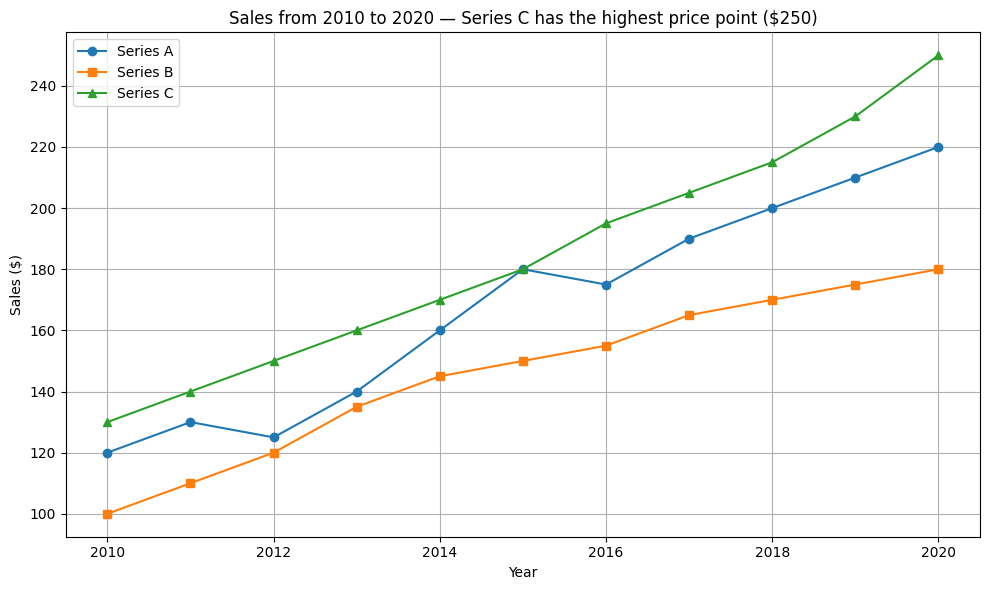

In [ ]:

# Plotting sales data for three series with the highest price point highlighted
years = np.arange(2010, 2021)
series_a = [120, 130, 125, 140, 160, 180, 175, 190, 200, 210, 220]
series_b = [100, 110, 120, 135, 145, 150, 155, 165, 170, 175, 180]
series_c = [130, 140, 150, 160, 170, 180, 195, 205, 215, 230, 250]
max_values = {
    'Series A': max(series_a),
    'Series B': max(series_b),
    'Series C': max(series_c)
}
highest_series = max(max_values, key=max_values.get)
plt.figure(figsize=(10, 6))
plt.plot(years, series_a, label='Series A', marker='o')
plt.plot(years, series_b, label='Series B', marker='s')
plt.plot(years, series_c, label='Series C', marker='^')
plt.title(f'Sales from 2010 to 2020 — {highest_series} has the highest price point (${max_values[highest_series]})')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

